In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
from kielmat.datasets import mobilised # new name
from kielmat.utils.kielmat_dataclass import KielMATRecording # Import the KielMATRecording class
from kielmat.modules.gsd import ParaschivIonescuGaitSequenceDetection # Import the Gait Sequence Detection module

In [18]:
# file_path contains a string that tells pd where ur data is 
file_path = 'IMUS1.tsv'

# Read the TSV file into a DataFrame
df = pd.read_csv(file_path, sep='\t', header = 1) # <- if we use this, we can see an uglier version of the data 
df.columns

Index(['Time', 'Accelerometer', 'Unnamed: 2', 'Unnamed: 3', 'Gyroscope',
       'Unnamed: 5', 'Unnamed: 6', 'Magnetometer', 'Unnamed: 8', 'Unnamed: 9',
       'Barometer', 'Orientation', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [19]:
df.head(5) # this is not really good for data analysis,
# If we open this in excel or some other csv handling software, we can see why it's formatted like this

,Time,Accelerometer,Unnamed: 2,Unnamed: 3,Gyroscope,Unnamed: 5,Unnamed: 6,Magnetometer,Unnamed: 8,Unnamed: 9,Barometer,Orientation,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,X,Y,Z,X,Y,Z,X,Y,Z,NaN,S,X,Y,Z
1,1.645200e+15,-9.924275,0.744738,1.44013,0.0425,0.063194,0.013976,29.908138,8.837042,15.392934,4.636850e+18,-0.764974,-0.044162,-0.642411,-0.013125
2,1.645200e+15,-9.900382,0.768888,1.488947,0.063933,0.033331,0.000101,29.908138,9.080527,15.478364,4.636850e+18,-0.764878,-0.044339,-0.642517,-0.012959
3,1.645200e+15,-9.875965,0.817546,1.549903,0.086359,0.022508,-0.015907,29.908138,9.167147,15.478988,4.636850e+18,-0.764806,-0.044544,-0.642594,-0.012686
4,1.645200e+15,-9.924262,0.817896,1.574577,0.098184,0.016069,-0.031928,29.835429,8.840564,15.588052,4.636850e+18,-0.764749,-0.044744,-0.642655,-0.012336


In [20]:
df = pd.read_csv(file_path, sep='\t',skiprows = 2, header = 1)

# Display the first few rows of the DataFrame

df.shape # rows, cols

(56011, 15)

In [21]:
df.head # right now our column names are nonexistent/nonsense

<bound method NDFrame.head of          1.6452E+15  -9.924275  0.744738   1.44013    0.0425  0.063194  \
0      1.645200e+15  -9.900382  0.768888  1.488947  0.063933  0.033331   
1      1.645200e+15  -9.875965  0.817546  1.549903  0.086359  0.022508   
2      1.645200e+15  -9.924262  0.817896  1.574577  0.098184  0.016069   
3      1.645200e+15  -9.900385  0.902713  1.611105  0.108872  0.005420   
4      1.645200e+15  -9.888087  0.988165  1.575027  0.115312  0.010642   
...             ...        ...       ...       ...       ...       ...   
56006  1.645200e+15  -9.602051  0.542301  1.126400 -0.038000  0.043341   
56007  1.645200e+15  -9.589844  0.538983  1.142321 -0.035574  0.048159   
56008  1.645200e+15  -9.598333  0.540440  1.114593 -0.032660  0.053733   
56009  1.645200e+15  -9.619433  0.546023  1.091632 -0.030687  0.052176   
56010  1.645200e+15  -9.614262  0.519747  1.109009 -0.028840  0.052050   

       0.013976  29.908138  8.837042  15.392934   4.63685E+18  -0.764974  \
0    

In [22]:
df.columns # like i said, just nonsense

Index(['1.6452E+15', '-9.924275', '0.744738', '1.44013', '0.0425', '0.063194',
       '0.013976', '29.908138', '8.837042', '15.392934', '4.63685E+18',
       '-0.764974', '-0.044162', '-0.642411', '-0.013125'],
      dtype='object')

### Trying to make the Columns better

In [23]:
# Define the new column headers
new_headers = [
    'Time', 'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z',
    'Gyroscope_X', 'Gyroscope_Y', 'Gyroscope_Z',
    'Magnetometer_X', 'Magnetometer_Y', 'Magnetometer_Z',
    'Barometer', 'Orientation_S', 'Orientation_X', 'Orientation_Y', 'Orientation_Z'
]

# Assign the new headers to the DataFrame
df.columns = new_headers

df.columns #that's better

Index(['Time', 'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z',
       'Gyroscope_X', 'Gyroscope_Y', 'Gyroscope_Z', 'Magnetometer_X',
       'Magnetometer_Y', 'Magnetometer_Z', 'Barometer', 'Orientation_S',
       'Orientation_X', 'Orientation_Y', 'Orientation_Z'],
      dtype='object')

In [24]:
df.head(3)

,Time,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,Magnetometer_X,Magnetometer_Y,Magnetometer_Z,Barometer,Orientation_S,Orientation_X,Orientation_Y,Orientation_Z
0,1.645200e+15,-9.900382,0.768888,1.488947,0.063933,0.033331,0.000101,29.908138,9.080527,15.478364,4.636850e+18,-0.764878,-0.044339,-0.642517,-0.012959
1,1.645200e+15,-9.875965,0.817546,1.549903,0.086359,0.022508,-0.015907,29.908138,9.167147,15.478988,4.636850e+18,-0.764806,-0.044544,-0.642594,-0.012686
2,1.645200e+15,-9.924262,0.817896,1.574577,0.098184,0.016069,-0.031928,29.835429,8.840564,15.588052,4.636850e+18,-0.764749,-0.044744,-0.642655,-0.012336


In [25]:
df.head(5)

,Time,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,Magnetometer_X,Magnetometer_Y,Magnetometer_Z,Barometer,Orientation_S,Orientation_X,Orientation_Y,Orientation_Z
0,1.645200e+15,-9.900382,0.768888,1.488947,0.063933,0.033331,0.000101,29.908138,9.080527,15.478364,4.636850e+18,-0.764878,-0.044339,-0.642517,-0.012959
1,1.645200e+15,-9.875965,0.817546,1.549903,0.086359,0.022508,-0.015907,29.908138,9.167147,15.478988,4.636850e+18,-0.764806,-0.044544,-0.642594,-0.012686
2,1.645200e+15,-9.924262,0.817896,1.574577,0.098184,0.016069,-0.031928,29.835429,8.840564,15.588052,4.636850e+18,-0.764749,-0.044744,-0.642655,-0.012336
3,1.645200e+15,-9.900385,0.902713,1.611105,0.108872,0.005420,-0.044767,29.919711,8.607941,15.600971,4.636850e+18,-0.764717,-0.044945,-0.642687,-0.011918
4,1.645200e+15,-9.888087,0.988165,1.575027,0.115312,0.010642,-0.056525,29.920345,8.763737,15.492010,4.636850e+18,-0.764671,-0.045135,-0.642736,-0.011450


In [26]:
def import_df(dataframe,tracked_points=["lowerBack"], sample_rate=None):
    # if we have just one string, put it into a list for consistency 
    if isinstance(tracked_points, str):     
        tracked_points = [tracked_points]
        
    # dictionary to store channels
    channels_dict = {
    "name": [],
    "component": [],
    "type": [],
    "tracked_point": [],
    "units": [],
    "sampling_frequency": [],
    }

    # dictionary for the data 
    data_dict = {}

    # defining sensor types that are consistent with the other import functions 
    sensor_types = ["ACCEL", "GYRO", "MAGN", "BARO", "ORIENT"]
    # just setting units for each t
    units = {
        "ACCEL": "m/s^2",
        "GYRO": "rad/s",
        "MAGN": "µT",
        "BARO": "Pa",
        "ORIENT": "quaternion"
    }

    sample_rate = sample_rate


    for col in df.columns:
            if col == "Time":
                continue

            sensor_type = next((st for st in sensor_types if st in col.upper()), None)
            if not sensor_type:
                continue

            component = col.split('_')[-1]
            data_dict[col] = df[col]

            channels_dict["name"].append(col)
            channels_dict["component"].append(component)
            channels_dict["type"].append(sensor_type)
            channels_dict["tracked_point"].append(tracked_points[0])
            channels_dict["units"].append(units[sensor_type])
            channels_dict["sampling_frequency"].append(sample_rate)

    # Create DataFrame from data_dict
    data = pd.DataFrame(data_dict)

    # Create DataFrame from channels_dict
    channels = pd.DataFrame(channels_dict)
    return data, channels



In [27]:
data, channels = import_df(df, sample_rate=100) # this is an arbitrary sample rate that seems consistent with the examples, but I'm not sure if it is actually representative of our data

# In order to find out the real sample rate, We'd need a better/more accurate time column (I believe it got compressed and the full value isn't there )

data

data = data[['Accelerometer_X','Accelerometer_Y','Accelerometer_Z']] # the input argument for the package says it needs 3 cols and only 3 cols

In [28]:
channels

,name,component,type,tracked_point,units,sampling_frequency
0,Accelerometer_X,X,ACCEL,lowerBack,m/s^2,100
1,Accelerometer_Y,Y,ACCEL,lowerBack,m/s^2,100
2,Accelerometer_Z,Z,ACCEL,lowerBack,m/s^2,100
3,Gyroscope_X,X,GYRO,lowerBack,rad/s,100
4,Gyroscope_Y,Y,GYRO,lowerBack,rad/s,100
5,Gyroscope_Z,Z,GYRO,lowerBack,rad/s,100
6,Magnetometer_X,X,MAGN,lowerBack,µT,100
7,Magnetometer_Y,Y,MAGN,lowerBack,µT,100
8,Magnetometer_Z,Z,MAGN,lowerBack,µT,100
9,Barometer,Barometer,BARO,lowerBack,Pa,100


8 gait sequence(s) detected.


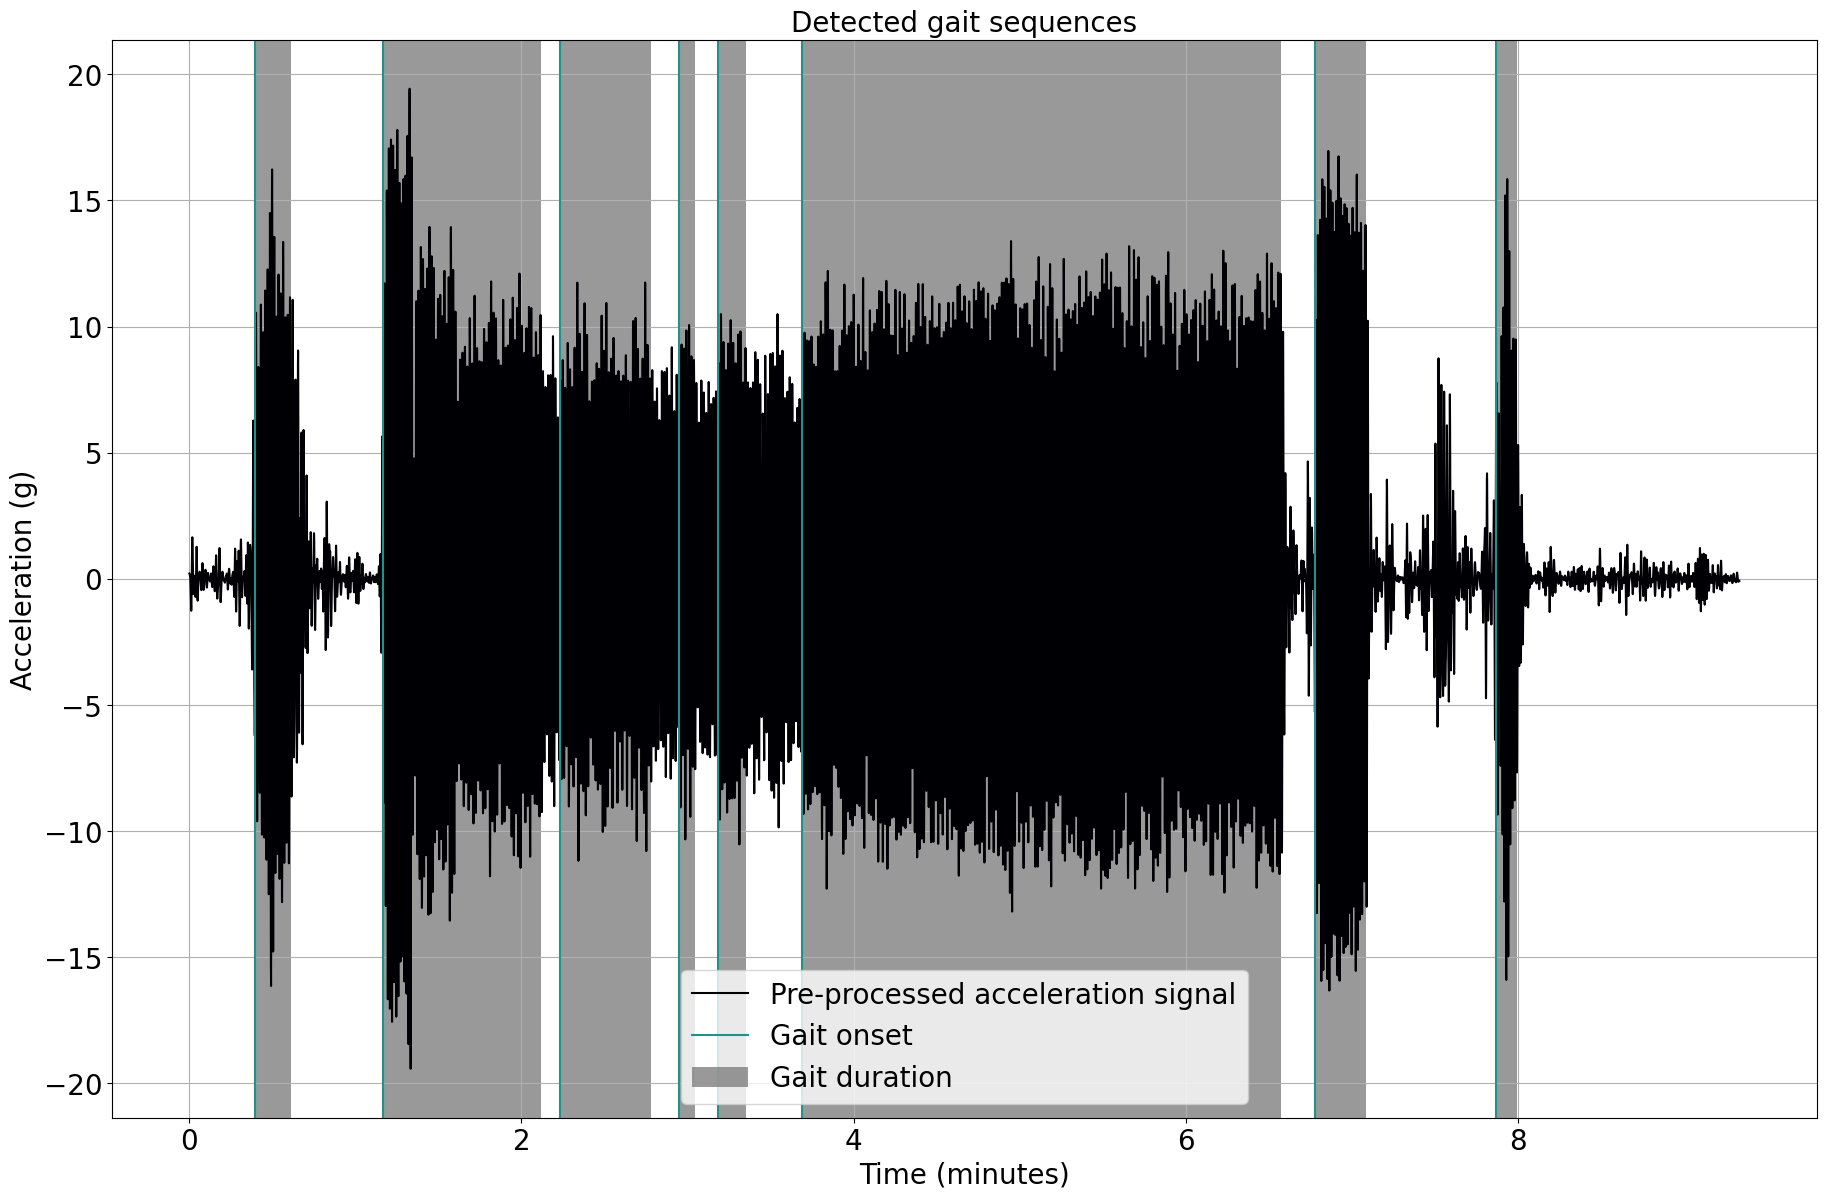

In [29]:
gsd = ParaschivIonescuGaitSequenceDetection() # just chose one of the algorithms in the package

gsd = gsd.detect(data=data, sampling_freq_Hz=100, plot_results=True, dt_data=None)

gait_sequences = gsd.gait_sequences_